## Machine Learning Assignment 2
#### Name : Nilay Subodh Pandya
#### ID : 2024DC04093

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix)
import warnings
warnings.filterwarnings("ignore")


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
# Load Data
print("Loading data...")
df = pd.read_csv('diabetes_data_upload.csv')
print("Data has been loaded!")

# Dataset selected is for predicting early stage diabetes risk using several symptoms. Data has 16 features and 520 instances.

Loading data...
Data has been loaded!


In [3]:
# Preprocessing: Encode ALL categorical columns
# We save the mappings to ensure the App uses the same logic
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
        # Print mapping to verify (e.g., Male=1, Female=0)
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Encoded {col}: {mapping}")

# Save encoders (optional, but good practice)
joblib.dump(encoders, "encoders.pkl")

Encoded Gender: {'Female': np.int32(0), 'Male': np.int32(1)}
Encoded Polyuria: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded Polydipsia: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded sudden weight loss: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded weakness: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded Polyphagia: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded Genital thrush: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded visual blurring: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded Itching: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded Irritability: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded delayed healing: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded partial paresis: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded muscle stiffness: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded Alopecia: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded Obesity: {'No': np.int32(0), 'Yes': np.int32(1)}
Encoded class: {'Negative': np.int32(0), 'Positive': np.int32(1)}


['encoders.pkl']

In [4]:
X = df.drop('class', axis=1)
y = df['class']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-Test splits saved!")

Train-Test splits saved!


In [5]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}
metrics_list = []

print("\nStarting Training...")

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Store results
    results[name] = {
        "Accuracy": acc, "AUC": auc, "Precision": prec, "Recall": rec, "F1": f1, "MCC": mcc
    }
    
    metrics_list.append({
        "Model": name, "Accuracy": acc, "AUC": auc, "Precision": prec, "Recall": rec, "F1": f1, "MCC": mcc
    })
    
    print(f"Trained model: {name} \n (Accuracy: {acc:.4f} | AUC : {auc:.4f}) | Precision : {prec:.4f}) | Recall : {rec:.4f}) | F1 : {f1:.4f}) | MCC : {mcc:.4f}) \n")
    
    # Save Model
    filename = name.lower().replace(" ", "_") + "_model.pkl"
    joblib.dump(model, filename)
    
    # Generate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig(f'{name.lower().replace(" ", "_")}_cm.png')
    plt.close()


Starting Training...
Trained model: Logistic Regression 
 (Accuracy: 0.9231 | AUC : 0.9714) | Precision : 0.9315) | Recall : 0.9577) | F1 : 0.9444) | MCC : 0.8204) 

Trained model: Decision Tree 
 (Accuracy: 0.9519 | AUC : 0.9648) | Precision : 1.0000) | Recall : 0.9296) | F1 : 0.9635) | MCC : 0.8985) 

Trained model: KNN 
 (Accuracy: 0.8558 | AUC : 0.9486) | Precision : 0.9516) | Recall : 0.8310) | F1 : 0.8872) | MCC : 0.7020) 

Trained model: Naive Bayes 
 (Accuracy: 0.9135 | AUC : 0.9607) | Precision : 0.9306) | Recall : 0.9437) | F1 : 0.9371) | MCC : 0.7988) 

Trained model: Random Forest 
 (Accuracy: 0.9904 | AUC : 1.0000) | Precision : 1.0000) | Recall : 0.9859) | F1 : 0.9929) | MCC : 0.9782) 

Trained model: XGBoost 
 (Accuracy: 0.9808 | AUC : 0.9991) | Precision : 1.0000) | Recall : 0.9718) | F1 : 0.9857) | MCC : 0.9572) 



In [6]:
# Save all results to be used by the App
joblib.dump(results, "model_results.pkl")

# # Save Comparison CSV for your README
# pd.DataFrame(metrics_list).to_csv("model_comparison.csv", index=False)
# print("\nProcess Complete. Files generated.")

# Save Comparison Table for README
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"])
metrics_df.to_csv("model_comparison.csv", index=False)

print("\nTraining Complete. All models and metrics saved.")
print(metrics_df)


Training Complete. All models and metrics saved.
                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.923077  0.971404   0.931507  0.957746  0.944444   
1        Decision Tree  0.951923  0.964789   1.000000  0.929577  0.963504   
2                  KNN  0.855769  0.948570   0.951613  0.830986  0.887218   
3          Naive Bayes  0.913462  0.960734   0.930556  0.943662  0.937063   
4        Random Forest  0.990385  1.000000   1.000000  0.985915  0.992908   
5              XGBoost  0.980769  0.999146   1.000000  0.971831  0.985714   

        MCC  
0  0.820358  
1  0.898479  
2  0.702009  
3  0.798823  
4  0.978222  
5  0.957234  


Bar chart saved as 'comparison_bar_chart.png'


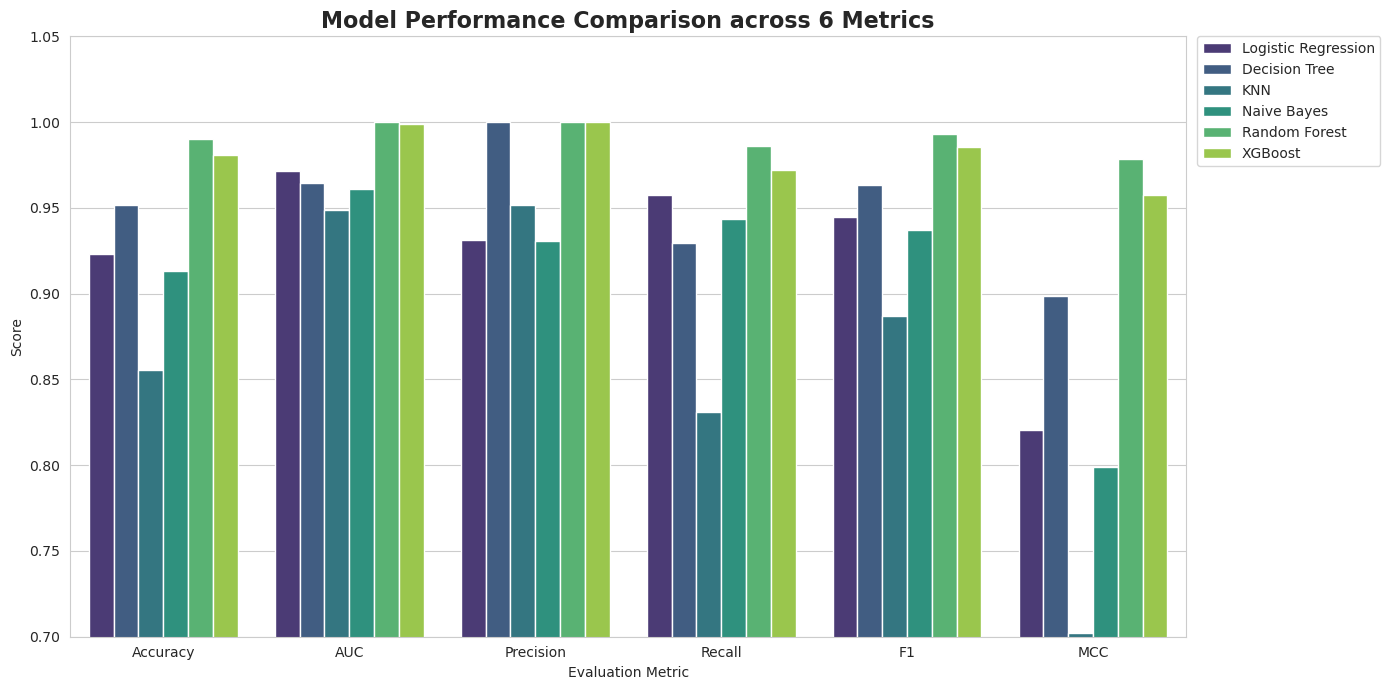

Heatmap saved as 'comparison_heatmap.png'


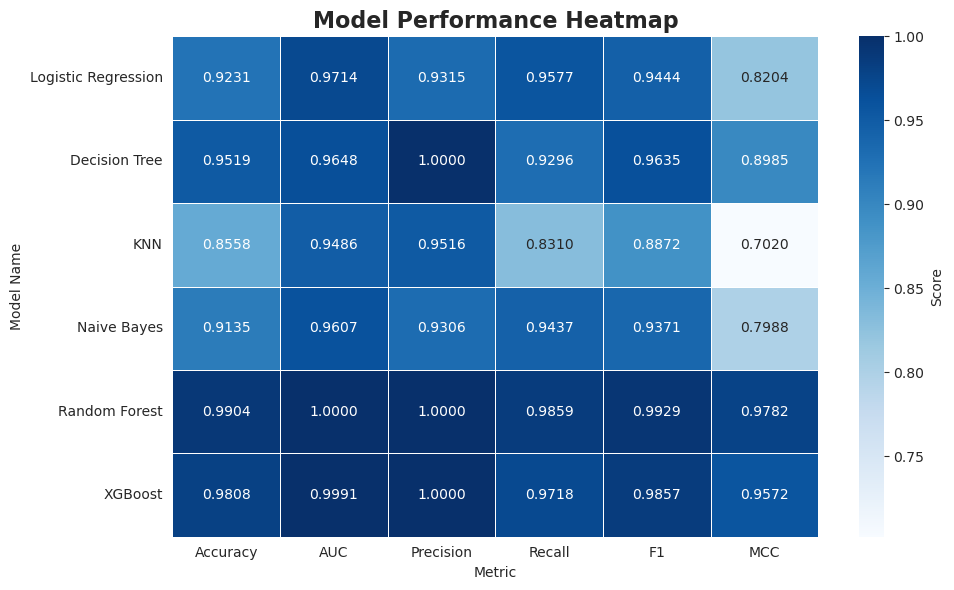

In [7]:
# Model Comparison (grouped by metric) - Graphical

df_compare = pd.read_csv("model_comparison.csv")

# Set global style
sns.set_style("whitegrid")

# --- Graph 1: Grouped Bar Chart (Best for Comparison) ---
# We melt the dataframe to make it suitable for seaborn
df_melted = df_compare.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 7))
plot = sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted, palette="viridis")

# Customization
plt.title("Model Performance Comparison across 6 Metrics", fontsize=16, fontweight='bold')
plt.ylim(0.7, 1.05)  # Zoom in to see differences (adjust as needed)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Score")
plt.xlabel("Evaluation Metric")
plt.tight_layout()

# Save
plt.savefig("comparison_bar_chart.png", dpi=300)
print("Bar chart saved as 'comparison_bar_chart.png'")
plt.show()

# --- Graph 2: Heatmap (Best for Overview) ---
plt.figure(figsize=(10, 6))
# Set 'Model' as index so it appears on Y-axis
heatmap_data = df_compare.set_index("Model")

sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".4f", linewidths=.5, cbar_kws={'label': 'Score'})

# Customization
plt.title("Model Performance Heatmap", fontsize=16, fontweight='bold')
plt.ylabel("Model Name")
plt.xlabel("Metric")
plt.tight_layout()

# Save
plt.savefig("comparison_heatmap.png", dpi=300)
print("Heatmap saved as 'comparison_heatmap.png'")
plt.show()
